# 1. Import Libraries

In [1]:
import snscrape.modules.twitter as sntwitter # for tweet mining
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import re # In-built regular expressions library
import string # Inbuilt string library
import random # generating random numbers
from PIL import Image # for opening, manipulating, and saving many different image file f
from matplotlib import pyplot as plt # for plotting


# Natural Language Processing Toolkit
import nltk
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data

from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds

from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO # For emojis


# 2. Tweet Mining

I used the method taught by [@TheOyinbooke](https://twitter.com/TheOyinbooke) in one of the #NG30DaysOfLearning sessions.

In [2]:
query = "(GenZHackfest OR GenZHackFest2022 OR #GenZHackFest2022) until:2022-07-16 since:2022-06-01"
tweets = []
limit = 30000


for tweet in sntwitter.TwitterHashtagScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.url, tweet.user.username, tweet.sourceLabel, tweet.user.location, tweet.content, tweet.likeCount, tweet.retweetCount,  tweet.quoteCount, tweet.replyCount])
        
data = pd.DataFrame(tweets, columns=['Tweet_Date', 'TweetURL','User', 'Source', 'Location', 'Tweet', 'Likes','Retweet_Count', 'Quote_Count', 'Replies'])

data.to_csv('GenZHackFest Raw.csv', index=False)

In [3]:
df=pd.read_csv('GenZHackFest Raw.csv')
df.head()

,Tweet_Date,TweetURL,User,Source,Location,Tweet,Likes,Retweet_Count,Quote_Count,Replies
0,2022-07-15 19:19:45+00:00,https://twitter.com/funmilayo_a_/status/154802...,funmilayo_a_,Twitter for Android,NaN,I got these quote stickers at the #GenZHackfes...,1,0,0,1
1,2022-07-15 18:22:50+00:00,https://twitter.com/funmilayo_a_/status/154801...,funmilayo_a_,Twitter for Android,NaN,Thank you @Ingressive4Good \nAnd @GenZtechies ...,0,0,0,0
2,2022-07-15 13:30:29+00:00,https://twitter.com/Debbiepeace8/status/154793...,Debbiepeace8,Twitter for Android,"Lagos, Nigeria",😂 We all can relate\n\n#programming #programmi...,19,8,1,2
3,2022-07-15 11:26:22+00:00,https://twitter.com/DahunsiSamuel5/status/1547...,DahunsiSamuel5,Twitter for Android,NaN,Blockchain Technology ‘Stole the Show’ at Gen ...,7,2,0,2
4,2022-07-15 10:32:21+00:00,https://twitter.com/EthereumNigeria/status/154...,EthereumNigeria,Twitter for Android,NaN,Highlights of the #genzhackfest2022 @GenZtechi...,8,2,1,0


In [4]:
df.describe()

,Likes,Retweet_Count,Quote_Count,Replies
count,1111.000000,1111.000000,1111.000000,1111.000000
mean,24.232223,2.964896,0.349235,0.857786
std,119.049441,9.130665,1.623725,2.961241
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.000000,0.000000
75%,17.000000,3.000000,0.000000,1.000000
max,3449.000000,242.000000,34.000000,73.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_Date     1111 non-null   object
 1   TweetURL       1111 non-null   object
 2   User           1111 non-null   object
 3   Source         1111 non-null   object
 4   Location       849 non-null    object
 5   Tweet          1111 non-null   object
 6   Likes          1111 non-null   int64 
 7   Retweet_Count  1111 non-null   int64 
 8   Quote_Count    1111 non-null   int64 
 9   Replies        1111 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 86.9+ KB


# 3. Data Cleaning

To remove duplicates, NaN values and to add/or remove columns.

In [6]:
df.isna().any() #To check the amount of empty values per column

Tweet_Date       False
TweetURL         False
User             False
Source           False
Location          True
Tweet            False
Likes            False
Retweet_Count    False
Quote_Count      False
Replies          False
dtype: bool

In [7]:
df['Location']=df['Location'].fillna('No location') #Replace empty location cells with 'No Location'

In [8]:
df.isna().any() #Crosscheck if there are still null values

Tweet_Date       False
TweetURL         False
User             False
Source           False
Location         False
Tweet            False
Likes            False
Retweet_Count    False
Quote_Count      False
Replies          False
dtype: bool

In [9]:
df.duplicated().sum() #Check for number of duplicate rows

0

In [10]:
# Split Date and Time
df['Date'] = pd.to_datetime(df['Tweet_Date']).dt.date
df['Time'] = pd.to_datetime(df['Tweet_Date']).dt.time
del df['Tweet_Date']

In [11]:
#Combine value for Retweets and Quoted replies
df['Retweets']=df.Retweet_Count + df.Quote_Count
del df['Retweet_Count']
del df['Quote_Count']

In [12]:
df['Engagements']=df.Retweets + df.Replies + df.Likes

In [13]:
# To rearrange the columns
df=df[['Date',
 'Time',
 'User',
 'Tweet',
 'Likes',
 'Replies',
 'Retweets',
 'Engagements',
 'TweetURL',
 'Source',
 'Location',]]
df.head()

,Date,Time,User,Tweet,Likes,Replies,Retweets,Engagements,TweetURL,Source,Location
0,2022-07-15,19:19:45,funmilayo_a_,I got these quote stickers at the #GenZHackfes...,1,1,0,2,https://twitter.com/funmilayo_a_/status/154802...,Twitter for Android,No location
1,2022-07-15,18:22:50,funmilayo_a_,Thank you @Ingressive4Good \nAnd @GenZtechies ...,0,0,0,0,https://twitter.com/funmilayo_a_/status/154801...,Twitter for Android,No location
2,2022-07-15,13:30:29,Debbiepeace8,😂 We all can relate\n\n#programming #programmi...,19,2,9,30,https://twitter.com/Debbiepeace8/status/154793...,Twitter for Android,"Lagos, Nigeria"
3,2022-07-15,11:26:22,DahunsiSamuel5,Blockchain Technology ‘Stole the Show’ at Gen ...,7,2,2,11,https://twitter.com/DahunsiSamuel5/status/1547...,Twitter for Android,No location
4,2022-07-15,10:32:21,EthereumNigeria,Highlights of the #genzhackfest2022 @GenZtechi...,8,0,3,11,https://twitter.com/EthereumNigeria/status/154...,Twitter for Android,No location


# 4. Tweets Processing

We need to clean the tweets before we can:
- Know the top words used to describe the event
- Perform Sentiments Analysis

In [14]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(Tweet):
    Tweet = Tweet.lower()  #has to be in place
    # Remove urls
    Tweet = re.sub(r"http\S+|www\S+|https\S+", '', Tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    Tweet = re.sub(r'\@\w+|\#|\d+', '', Tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(Tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


In [15]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ['2022', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'next', 'senator', 'yall', 'lagos', 'attending', 'till', 'live', 'Gen', 'GenZHackFest', 'GenZ Hackfest',
                  'GenZhackfest2022']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words +  alphabets + user_stop_words
word_list = words.words()  # all words in English language
emojis = list(UNICODE_EMOJI.keys())  # full list of emojis

In [16]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [17]:
# Apply preProcessTweets function to the 'Tweet' column to generate a new column called 'Processed Tweets'.
df['Processed_Tweets'] = df['Tweet'].apply(preprocessTweets)
df.head()

,Date,Time,User,Tweet,Likes,Replies,Retweets,Engagements,TweetURL,Source,Location,Processed_Tweets
0,2022-07-15,19:19:45,funmilayo_a_,I got these quote stickers at the #GenZHackfes...,1,1,0,2,https://twitter.com/funmilayo_a_/status/154802...,Twitter for Android,No location,got quote stickers event reminder encouragemen...
1,2022-07-15,18:22:50,funmilayo_a_,Thank you @Ingressive4Good \nAnd @GenZtechies ...,0,0,0,0,https://twitter.com/funmilayo_a_/status/154801...,Twitter for Android,No location,thank hosting amazing conference
2,2022-07-15,13:30:29,Debbiepeace8,😂 We all can relate\n\n#programming #programmi...,19,2,9,30,https://twitter.com/Debbiepeace8/status/154793...,Twitter for Android,"Lagos, Nigeria",relate
3,2022-07-15,11:26:22,DahunsiSamuel5,Blockchain Technology ‘Stole the Show’ at Gen ...,7,2,2,11,https://twitter.com/DahunsiSamuel5/status/1547...,Twitter for Android,No location,technology stole show gen made news thank mention
4,2022-07-15,10:32:21,EthereumNigeria,Highlights of the #genzhackfest2022 @GenZtechi...,8,0,3,11,https://twitter.com/EthereumNigeria/status/154...,Twitter for Android,No location,


In [18]:
# Apply getAdjectives function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Adjectives'
df['Tweets_Adjectives'] = df['Processed_Tweets'].apply(getAdjectives)

In [19]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [20]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Tweets_Sentiments'
df['Tweets_Sentiments'] = df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [21]:
df.head() # Check dataframe first 5 rows

,Date,Time,User,Tweet,Likes,Replies,Retweets,Engagements,TweetURL,Source,Location,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments
0,2022-07-15,19:19:45,funmilayo_a_,I got these quote stickers at the #GenZHackfes...,1,1,0,2,https://twitter.com/funmilayo_a_/status/154802...,Twitter for Android,No location,got quote stickers event reminder encouragemen...,quote,got quote sticker event reminder encouragement...
1,2022-07-15,18:22:50,funmilayo_a_,Thank you @Ingressive4Good \nAnd @GenZtechies ...,0,0,0,0,https://twitter.com/funmilayo_a_/status/154801...,Twitter for Android,No location,thank hosting amazing conference,amazing,thank hosting amazing conference
2,2022-07-15,13:30:29,Debbiepeace8,😂 We all can relate\n\n#programming #programmi...,19,2,9,30,https://twitter.com/Debbiepeace8/status/154793...,Twitter for Android,"Lagos, Nigeria",relate,,relate
3,2022-07-15,11:26:22,DahunsiSamuel5,Blockchain Technology ‘Stole the Show’ at Gen ...,7,2,2,11,https://twitter.com/DahunsiSamuel5/status/1547...,Twitter for Android,No location,technology stole show gen made news thank mention,,technology stole show gen made news thank mention
4,2022-07-15,10:32:21,EthereumNigeria,Highlights of the #genzhackfest2022 @GenZtechi...,8,0,3,11,https://twitter.com/EthereumNigeria/status/154...,Twitter for Android,No location,,,


## 5. Data Exploration
In this section, the aim was to show the most common words used by Twitter Users to describe the event. This was made possible by the "getAdjectives" function in Section 4.

In [22]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

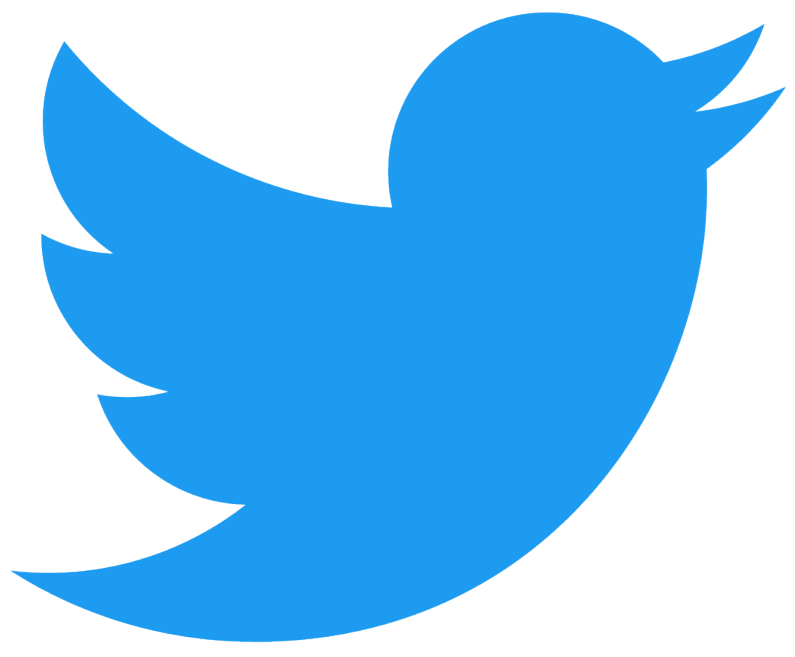

In [23]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [24]:
# Create function to generate the teal colour for the Word CLoud

def teal_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(177, 42%%, %d%%)" % random.randint(30, 35)

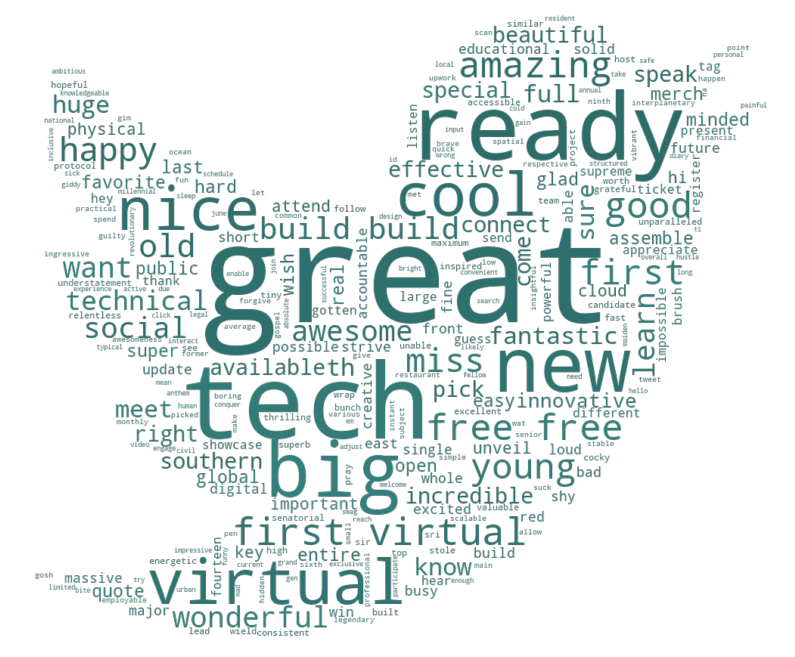

In [25]:
# Instantiate the Twitter word cloud object
twitter_wc2 = WordCloud(mode='RGBA',background_color=None, max_words=1500, mask=image)

# generate the word cloud
twitter_wc2.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc2.recolor(color_func=teal_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
twitter_wc2.to_file("wordcloud teal.png"); #save to a png file

# Sentiment analysis

This is to know what Users feel about the event. Their tweets can either reflect a positive, neutral or negative persection of the event.

In [27]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [28]:
# Apply all functions above to respective columns
df['Subjectivity']=df['Tweets_Sentiments'].apply(getSubjectivity)
df['Polarity']=df['Tweets_Sentiments'].apply(getPolarity)
df['Sentiment']=df['Polarity'].apply(getSentimentTextBlob)

In [29]:
# See quick results of the Sentiment Analysis
df['Sentiment'].value_counts()

Neutral     692
Positive    375
Negative     44
Name: Sentiment, dtype: int64

In [30]:
df.head()

,Date,Time,User,Tweet,Likes,Replies,Retweets,Engagements,TweetURL,Source,Location,Processed_Tweets,Tweets_Adjectives,Tweets_Sentiments,Subjectivity,Polarity,Sentiment
0,2022-07-15,19:19:45,funmilayo_a_,I got these quote stickers at the #GenZHackfes...,1,1,0,2,https://twitter.com/funmilayo_a_/status/154802...,Twitter for Android,No location,got quote stickers event reminder encouragemen...,quote,got quote sticker event reminder encouragement...,0.6,0.5,Positive
1,2022-07-15,18:22:50,funmilayo_a_,Thank you @Ingressive4Good \nAnd @GenZtechies ...,0,0,0,0,https://twitter.com/funmilayo_a_/status/154801...,Twitter for Android,No location,thank hosting amazing conference,amazing,thank hosting amazing conference,0.9,0.6,Positive
2,2022-07-15,13:30:29,Debbiepeace8,😂 We all can relate\n\n#programming #programmi...,19,2,9,30,https://twitter.com/Debbiepeace8/status/154793...,Twitter for Android,"Lagos, Nigeria",relate,,relate,0.0,0.0,Neutral
3,2022-07-15,11:26:22,DahunsiSamuel5,Blockchain Technology ‘Stole the Show’ at Gen ...,7,2,2,11,https://twitter.com/DahunsiSamuel5/status/1547...,Twitter for Android,No location,technology stole show gen made news thank mention,,technology stole show gen made news thank mention,0.0,0.0,Neutral
4,2022-07-15,10:32:21,EthereumNigeria,Highlights of the #genzhackfest2022 @GenZtechi...,8,0,3,11,https://twitter.com/EthereumNigeria/status/154...,Twitter for Android,No location,,,,0.0,0.0,Neutral


# 6. Export for Analysis and Visualization

In [33]:
df_cleaned=df[['Date', 'Time', 'User', 'Tweet', 'Likes', 'Retweets', 'Replies', 'Engagements', 'Source', 'Location', 'Sentiment', 'TweetURL']]
df_cleaned.to_csv('GenZHackFest Cleaned.csv', index=False)

# The End


Thanks for reading. I hope you got some insights and learnt a thing or two. You can read the report [here](https://github.com/Zion-Zion/GenZHackFest-Tweets-Analysis).

You can take a look at my profile on [Twitter](https://twitter.com/Xionne_)

> Special thanks to [Jessica](https://linktr.ee/jessanalytics) for the [notebook](https://github.com/jess-data/Twitter-2020-Sentiment-Analysis) that birthed this, and [Paul](https://twitter.com/PauloDaguvnor) also, for their reviews and feedbacks.